In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests3 import * 

from autils1 import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)


In [9]:
#load data
X,y=load_data()

In [16]:
# view variables
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])
#print(f"the first element of x is: {X[0]}")
print(y.shape) 
print(X.shape)

The first element of y is:  0
The last element of y is:  9
(5000, 1)
(5000, 400)


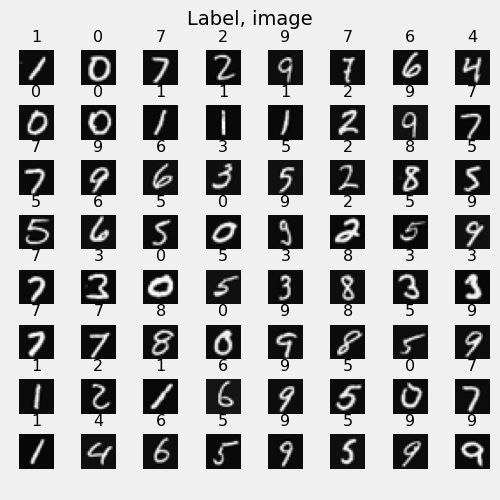

In [15]:
# visualize data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

<a name="4.3"></a>
### 4.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  


- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention: 
               

In [12]:
tf.random.set_seed(1234)
model=Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25,activation='relu' ,name='l1'),
        Dense(15,activation='relu', name='l2'),
        Dense(10,activation='linear' ,name='l3')

    ],name="new_model"

)

In [13]:
model.summary()

Model: "new_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ l1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# test_model(model,10,400)

In [19]:
[l1,l2,l3]=model.layers

In [21]:
# exmine the weights

W1,b1=l1.get_weights()
W2,b2=l2.get_weights()
W3,b3=l3.get_weights()

print(f"w1 shape: {W1.shape} b1 shape: {b1.shape}")
print(f"w2 shape: {W2.shape} b2 shape: {b2.shape}")
print(f"w3 shape: {W3.shape} b3 shape: {b3.shape}")

w1 shape: (400, 25) b1 shape: (25,)
w2 shape: (25, 15) b2 shape: (15,)
w3 shape: (15, 10) b3 shape: (10,)


In [23]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

history=model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - loss: 2.0085
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.7578
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.4369
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.3414
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.2911
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.2564
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 0.2314
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2105
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.1935
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.1795
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.1671
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.1564
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.1469
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.1383
Epoch 15/40
157/157 ━━━━━━━━━━━

In [29]:
#plot_loss_tf(history)

array([ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  2.93e-05, -5.16e-04, -3.34e-04,
        7.73e-05, -2.00e-03, -1.15e-02, -2.58e-02, -3.51e-02, -3.52e-02,
       -3.52e-02, -3.59e-02, -2.40e-02, -3.80e-03, -6.12e-04,  9.54e-05,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, 

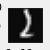

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
prediction : [[ -9.84   4.15   7.02   3.03 -22.1   -2.3  -10.25   3.78  -5.87 -10.11]]


In [33]:
image_of_two=X[1015]
display_digit(image_of_two)

prediction=model.predict(image_of_two.reshape(1,400))

print(f"prediction : {prediction}")
#print(f"largest prediction: {np.argmax(prediction)}")


In [ ]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [35]:
yhat=np.argmax(prediction)
print(f"y hat : {yhat}" )

y hat : 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━

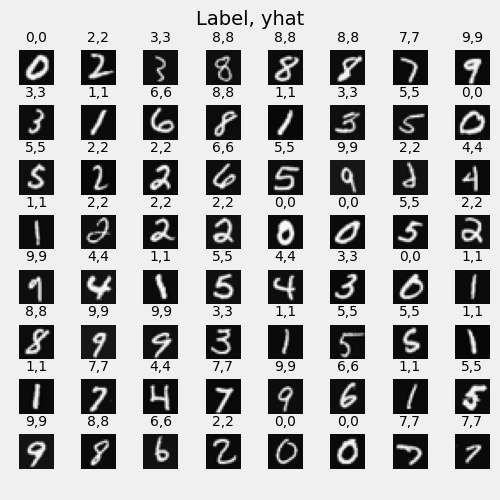

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
18 errors out of 5000 images


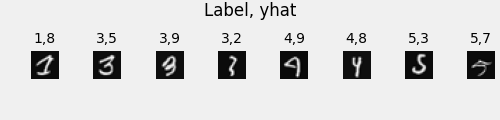

In [37]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")
